In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import random
from IPython.display import HTML



In [3]:
class particle:

    def __init__(self, x, v, m, axis_list,r):
        self.x = x
        self.v = v
        self.m = m
        self.list = axis_list
        self.r=r


In [4]:

particles = []
colours = ['bo', 'co', 'go','mo','ro','yo']


In [5]:

def collision(m1, m2, v1, v2):
    #these formulas only apply if collision occurs. need to check if they occur or not...
    v3 = (2*m2*v2+(m1-m2)*v1)/(m1+m2)
    v4 = ((m2-m1)*v2+2*m1*v1)/(m1+m2)
    return v3, v4

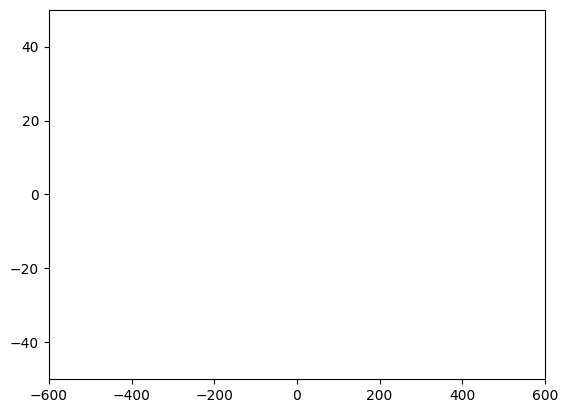

In [6]:
fig = plt.figure()
axis = plt.axes(xlim =(-600, 600),
                ylim =(-50, 50))


In [7]:
n=10
x_length = 1000
x=-480

heavy_list_2, = axis.plot([], [], 'ko', ms = 1)
heavy_2 = particle(-600,0,1000000000000000,heavy_list_2, 1)
particles.append(heavy_2)

#make 2 random balls have mass of ratio 1:4
rand_1 = random.randint(0,n)
rand_1_vel = []
rand_1_x = []
flag=True
while flag==True:
    rand_2 = random.randint(0,n)
    if rand_2 != rand_1:
        flag=False
rand_2_vel = []
rand_2_x = []
#in actual list the indices of my chosen masses is rand_1 + 1


In [8]:
for i in range(n):
    if i == rand_1:
        m1 = 1
    elif i ==rand_2:
        m1 = 10000
    else:
        m1=random.uniform(1, 100)
    r = 2*np.log(1+m1)
    v1 = random.uniform(-40, 40)

    x+=(x_length-20)/n
    axis_list, = axis.plot([], [], colours[i%len(colours)], ms = r)
    p=particle(x, v1, m1, axis_list,r)
    particles.append(p)



In [9]:
#adding heavy particles
heavy_list_1, = axis.plot([], [], 'ko', ms = 1)
heavy_1 = particle(600,0,100000000000000,heavy_list_1, 1)
particles.append(heavy_1)




dt = 0.05

In [10]:


def init():
    for p in particles:

        p.list.set_data([], [])

    return [p.list for p in particles]

In [11]:

def animate(i):

    # t is a parameter which varies
    # with the frame number

    for p in particles:
        p.x += dt * p.v

        p.list.set_data([p.x], [0])



    #closest neighbours check
    for i in range(0,n+1):
        if abs(particles[i].x - particles[i+1].x) < 1.7*(particles[i].r + particles[i+1].r):
            particles[i].v, particles[i+1].v = collision(particles[i].m, particles[i+1].m, particles[i].v, particles[i+1].v)

        if i == rand_1 or i==rand_1-1:
            rand_1_vel.append(particles[rand_1+1].v)
            rand_1_x.append(particles[rand_1+1].x)
        if i == rand_2 or i==rand_2-1:
            rand_2_vel.append(particles[rand_2+1].v)
            rand_2_x.append(particles[rand_2+1].x)






    return [p.list for p in particles]


In [12]:

# calling the animation function


anim = animation.FuncAnimation(fig, animate,
                               init_func=init,
                               frames=400,
                               interval=20,
                        
                               blit=True)

HTML(anim.to_jshtml())



In [13]:
anim.save('animation.html', writer='html')

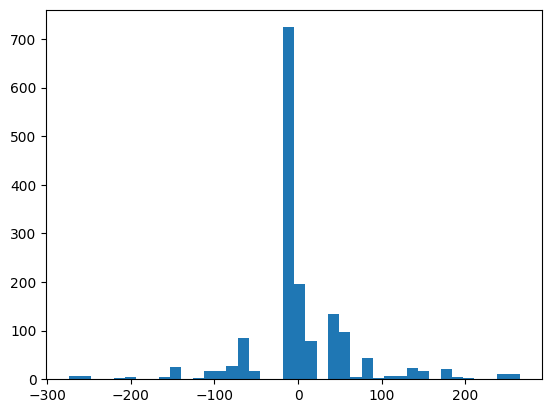

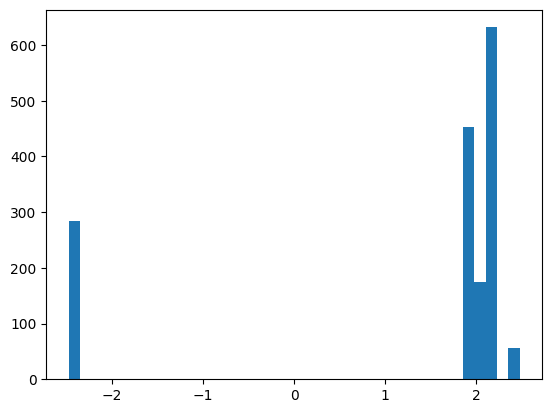

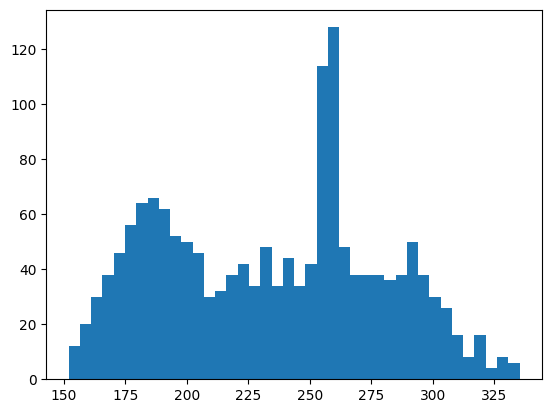

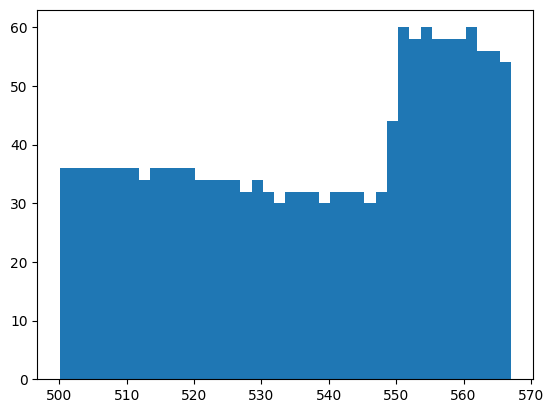

In [14]:






plt.hist(rand_1_vel,bins = int(np.sqrt(len(rand_1_vel))), label='m=1')
plt.show()
plt.hist(rand_2_vel,bins = int(np.sqrt(len(rand_2_vel))), label = 'm=10000')
plt.show()
plt.hist(rand_1_x,bins = int(np.sqrt(len(rand_1_x))), label='m=1')
plt.show()
plt.hist(rand_2_x,bins = int(np.sqrt(len(rand_2_x))), label = 'm=10000')
plt.show()



